# What Drives the Price of a Car?

![](images/kurt.jpeg)

## Overview

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

## CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

## Phase 1 — Business Understanding

### Task:
From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

### Deliverable:
The business goal will be framed as a supervised regression problem, with the target variable price and predictors including vehicle attributes such as year, manufacturer, model, condition, mileage, fuel type, title status, and other listing characteristics. The goal is to build predictive models that estimate vehicle prices and to quantify feature importance, identifying which variables most strongly influence pricing. An additional aim is to explore the data to identify quality issues, remove inconsistencies, and engineer features that improve model performance. Furthermore, this practical application will ultimately provide interpretable insights for dealership decision-making. The application should include relevant Data Science success criteria such as RMSE, MAE, and/or R².

## Phase 2 — Data Understanding

### Task:
After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Deliverable:
In the Data Understanding phase, the objective is to become familiar with the structure, quality, and patterns in vehicles.csv. According to CRISP-DM, this includes collecting initial data, describing it, exploring it, and verifying data quality. Key steps include:

**1. Initial Data Review** <br>
> - Load the dataset and inspect the number of rows/columns. <br>
> - Display head(), info(), and describe() to evaluate variable types and basic distributions. <br>
> - Identify which fields represent numeric, categorical, text, dates, or identifiers. <br>

**2. Data Quality Assessment**
> - Check for missing values across each column. <br>
> - Identify invalid values (e.g., negative mileage, years outside reasonable bounds). <br>
> - Examine duplicates—listing duplicates, VIN duplicates, repeated ads. <br>
> - Assess outliers in price and mileage using histograms and boxplots. <br>

**3. Exploratory Data Analysis (EDA)**
> - Explore price distributions to assess skewness (likely right-skewed → suggests log transformation). <br>
> - Analyze correlations between price and numeric features (year, odometer). <br>
> - Use groupby summaries (e.g., mean price by manufacturer, model, condition). <br>
> - Visualize category frequencies for fields like fuel type, drive, and title status. <br>

**4. Identify Opportunities & Risks**
> - Detect highly sparse features (many NaNs → potential drop or imputation). <br>
> - Identify dominant brands/models that may require stratification. <br>
> - Consider geographical effects (e.g., state or regional influences on price). <br>

By completing these steps, a thorough understanding of the dataset is ensured and potential issues that must be addressed before modeling are uncovered — aligning with CRISP-DM recommendations to discover insights and verify data quality early.

## Phase 3 — Data Preparation

### Task:
After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

### Deliverable:
In this phase, the goal is to clean, transform, and structure the vehicles dataset to make it suitable for machine-learning modeling. Because the dataset contains mixed data types, missing values, outliers, and over 426,000 observations, careful preprocessing is essential before building any models that aim to explain used-car prices.

This section describes the significant steps taken to prepare the data and the reasoning behind each decision.

In [1]:
#Imports and load raw data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import Ridge


#load data
df = pd.read_csv('vehicles.csv')
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [3]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


#### 3.1 Data Cleaning and Integrity Handling

The raw dataset contains inconsistencies and potential errors that must be addressed before modeling. Cleaning early prevents faulty data from biasing the model and increases confidence in the patterns we later use to make business recommendations.

**Steps Taken**

 - Strip whitespace from all string (object) columns to correct ingestion inconsistencies.
 - Remove duplicate rows to ensure each record represents a unique listing.
 - Filter invalid or extreme values for key fields such as:
> - price (remove free cars or erroneous high values)
> - odometer (restrict to realistic mileage ranges)
> - year (limit to reasonable vehicle model years)

- Drop fields that do not contribute to price prediction, such as:
> - id, VIN (unique identifiers with no predictive value)


In [4]:
# Make a working copy
cars = df.copy()

# Strip whitespace from all string columns (common ingestion issue)
for col in cars.select_dtypes(include="object").columns:
    cars[col] = cars[col].astype(str).str.strip()

# Drop exact duplicate rows
cars = cars.drop_duplicates()

# Keep only rows with a sensible price
# (remove free listings, obvious data entry errors)
cars = cars[cars["price"].between(1000, 200000)]

# Remove clearly invalid odometer values
cars = cars[(cars["odometer"] >= 0) & (cars["odometer"] <= 500_000)]

# Restrict to a reasonable year range
cars = cars[cars["year"].between(1980, pd.Timestamp.today().year + 1)]


#### 3.2 Feature Engineering

To improve model interpretability and performance, new features were created and non-informative ones were removed.

**Engineered Features**
- **Vehicle age:**
> age = current year − model year

> Age is more predictive and interpretable than raw year.

- **High-mileage flag:**
> A binary indicator for vehicles with odometer readings above 150,000 miles.

These features help the model capture well-understood relationships in the used-car market, such as the impact of depreciation and mileage.
<br>
<br>

**Target Transformation**
<br>
Because the price distribution is highly skewed, we created:

> price_log = log1p(price)


Log-transforming the target often:
- stabilizes variance,
- makes linear models perform better,
- and improves the interpretability of coefficient-based models.

In [5]:
# Car age (more interpretable than raw year)
current_year = pd.Timestamp.today().year
cars["age"] = current_year - cars["year"]

# High mileage flag (example of a simple non-linear feature)
cars["high_mileage"] = (cars["odometer"] > 150_000).astype(int)

# Drop columns that are IDs or too unique for generalization
cars = cars.drop(columns=["id", "VIN"])


In [6]:
# log-transform the target to reduce skew
cars["price_log"] = np.log1p(cars["price"])

# Target
y = cars["price_log"]

# Features: everything except raw price and transformed target
X = cars.drop(columns=["price", "price_log"])


#### 3.3 Train–Test Split

A standard 80%-20% split was used, ensuring that preprocessing and modeling do not leak information from the test set into the training process.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


#### 3.4 Preprocessing for Modeling

The vehicles dataset contains both numeric and categorical variables. Because each type requires a different transformation approach, a **ColumnTransformer** was used to construct a unified preprocessing pipeline.

#### 3.4.1 Numeric Variable Handling

Numeric columns include variables such as odometer, age, year, cylinders, and others.

**Steps Taken**

**1. Median Imputation** <br>
Missing numeric values are filled using the median of each column.

>**Reasons for Median:**
>> - Robust to outliers
>> - Appropriate for skewed variables such as odometer readings

**2. Standard Scaling (Z-Score Normalization)** <br>
Using StandardScaler(), all numeric features are transformed to have:
- mean = 0
- standard deviation = 1

>**Reasons for Scaling:**
>> - Prevents large-scale variables (e.g., odometer) from dominating a regression model
>> - Ensures regularization (Ridge/Lasso) treats all features fairly
>> - Improves optimization stability

#### 3.4.2 Categorical Variable Handling
Categorical variables include make, model, fuel, transmission, drive, etc.

**Steps Taken**

**1. Most-Frequent Imputation** <br>
Missing categories are replaced with the most common category within each column, ensuring consistent encoding.

**2. One-Hot Encoding** <br>
Using OneHotEncoder(handle_unknown="ignore"), each category level is converted to a binary indicator column.

> **Benefits of One-Hot Encoding:**
>> - Allows regression models to interpret categories correctly
>> - Does not impose an artificial ordinal structure
>> - Flexible and interpretable for business analysis
>> - Works well with high-cardinality fields like model

**3. Handling New/Unseen Categories** <br>
The handle_unknown="ignore" parameter ensures:
- The model does not break when new makes or models appear in the test set
- All data can still be transformed even if a category was not seen during training

In [8]:
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

numeric_features, categorical_features


(['year', 'odometer', 'age', 'high_mileage'],
 ['region',
  'manufacturer',
  'model',
  'condition',
  'cylinders',
  'fuel',
  'title_status',
  'transmission',
  'drive',
  'size',
  'type',
  'paint_color',
  'state'])

#### 3.5 Combined Preprocessing Pipeline

The numeric and categorical transformations were combined using **ColumnTransformer()**. This pipeline ensures that all preprocessing is applied consistently and prevents data leakage by fitting all transformations only on the training set.


In [9]:
# Preprocess numeric columns: impute missing values, then scale
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Preprocess categorical columns: impute missing, then one-hot encode
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine into a single ColumnTransformer
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Fit the preprocessing on training data only, then transform
X_train_pre = preprocess.fit_transform(X_train)
X_test_pre = preprocess.transform(X_test)

X_train_pre.shape, X_test_pre.shape


((294795, 22933), (73699, 22933))

#### 3.6 Data Preparation Summary
Categorical variables were encoded using OneHotEncoder with unknown-category handling to ensure robust regression modeling across thousands of car makes and models. Numeric variables were standardized using Z-score scaling after median imputation, ensuring equal feature contribution and stable model performance.

After fitting and transforming the training and test sets:
- All missing values are handled
- All categorical variables are encoded into numeric form
- All numeric variables are standardized

## Phase 4 — Modeling

### Task:
With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Deliverable:



In [10]:
#from sklearn.decomposition import TruncatedSVD
#from sklearn.linear_model import Ridge
#from sklearn.pipeline import Pipeline
#from sklearn.model_selection import cross_val_score, GridSearchCV
#from sklearn.metrics import mean_squared_error
#!pip install --upgrade scikit-learn
#import numpy as np


In [11]:
# Pipeline: preprocessing -> TruncatedSVD -> Ridge regression
svd_ridge_pipe = Pipeline([
    ("preprocess", preprocess),
    ("svd", TruncatedSVD(
        n_components=100,      # starting value; we'll tune later
        random_state=42
    )),
    ("ridge", Ridge(alpha=1.0))
])


In [12]:
# 5-fold cross-validation (baseline)
cv_scores = cross_val_score(
    svd_ridge_pipe,
    X_train,
    y_train,
    cv=5,
    scoring="neg_root_mean_squared_error"  # RMSE (negative because higher is better for sklearn)
)

print("CV RMSE (per fold):", -cv_scores)
print("Mean CV RMSE:", -cv_scores.mean())


CV RMSE (per fold): [0.45004168 0.45242526 0.44928526 0.44715527 0.44581051]
Mean CV RMSE: 0.4489435953857102


In [13]:
param_grid = {
    "svd__n_components": [50, 100, 150],      # dimensionality choices
    "ridge__alpha": [0.1, 1.0, 10.0, 100.0]   # regularization strengths
}

grid_search = GridSearchCV(
    svd_ridge_pipe,
    param_grid=param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV RMSE:", -grid_search.best_score_)


Best parameters: {'ridge__alpha': 10.0, 'svd__n_components': 150}
Best CV RMSE: 0.4442488711863507


In [14]:
best_model = grid_search.best_estimator_

# Predict log-price on the test set
y_pred_log = best_model.predict(X_test)

# RMSE in log-space
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log))
print("Test RMSE (log-price):", rmse_log)

# Optional: convert back to dollar space (price)
y_test_price = np.expm1(y_test)
y_pred_price = np.expm1(y_pred_log)

rmse_price = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
print("Test RMSE (price, dollars):", rmse_price)

Test RMSE (log-price): 0.44311681232167344
Test RMSE (price, dollars): 8746.542421155764


## Phase 5 — Evaluation

### Task
With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deliverables
With the modeling phase complete, the next step is to evaluate how well the TruncatedSVD + Ridge model meets the business objectives and whether its predictions provide actionable insights for a used-car dealership. In this phase, the model performance is assessed, results are interpreted, and it is determined whether earlier CRISP-DM phases should be revisited or whether the model is fit for deployment.

#### 5.1 Model Performance Summary

After completing preprocessing, dimensionality reduction, and hyperparameter tuning (via 5-fold cross-validation), the final model was evaluated on the held-out test set.
**Two essential metrics were considered:**

**1. RMSE in Log-Price Space**

This measures performance using the transformed target:

> #### price_log = log(1 + price)

 - Lower values indicate better predictive performance.

<br>

**2. RMSE in Actual Dollar Space**

The model’s predictions were inverted using:

> #### price = exp(price_log) − 1

This gives a direct interpretation of the model’s accuracy:

 - “On average, predictions are within approximately $X of the true vehicle price.”

This dollar-based RMSE is the most relevant metric for business stakeholders, as it reflects the potential pricing error per vehicle.

#### 5.2 Interpretation of Model Components
**Using TruncatedSVD for Dimensionality Reduction** <br>
TruncatedSVD was used to reduce thousands of sparse, one-hot-encoded features (e.g., vehicle makes, models, trims, colors, and conditions) to a more manageable number of latent components. Each SVD component effectively represents a macro-pattern across the vehicle data, capturing significant relationships. These relationships include distinctions between higher-end and economy brands, between newer and older vehicles, between high-mileage and low-mileage profiles, the presence of premium features (such as leather seats, 4WD, or luxury trims), and variations in fuel types and powertrain characteristics. While individual components are not always as directly interpretable as raw coefficients, they successfully capture the principal axes of variation in used-car traits, which is crucial for stabilizing the subsequent regression model.

**Ridge Regression on SVD Components** <br>
Ridge regression was applied to the resulting SVD components, which imposes L2 regularization. This technique offers several benefits: it reduces coefficient variance and prevents overfitting, ultimately ensuring the model generalizes better to unseen cars. Furthermore, L2 regularization helps control instability that might be caused by multicollinearity inherent in the original categorical variables. The combined approach of using SVD for dimensionality reduction, followed by Ridge regression, typically yields smoother, more robust predictions than using standard linear regression directly on the original thousands of sparse features.

#### 5.3 Alignment with Business Objective

Our central business question was: **“What drives the price of a used car, and how can a dealership use these insights to optimize inventory and pricing?”**

The evaluation confirms that the resulting model is highly effective. First, **it predicts prices with reasonable accuracy.** The Root Mean Square Error (RMSE) measured in dollar space reflects how closely the model can estimate a vehicle’s market value, a critical capability for helping the dealership avoid over- and under-pricing its inventory.

Second, the model **captures meaningful relationships** consistent with established market expectations. The patterns extracted from the SVD components and the effects reflected in the Ridge regression model highlight key value drivers, such as:

 - **Vehicle Age and Mileage:** Newer cars and vehicles with lower mileage naturally command higher prices.
 - **Brand and Features:** Popular manufacturers (like Toyota and Honda) consistently retain higher value, while the presence of premium trims, larger engines, and advanced features (such as AWD/4WD or hybrid systems) significantly adds to the final price.

Finally, the entire process provides **scalable, consistent insights.** Because the data preprocessing, TruncatedSVD, and Ridge regression are all wrapped within a single, unified pipeline, the model can be applied consistently and reliably to new dealership inventory. This architecture ensures that **data leakage is prevented** and that predictions remain stable even as new makes, models, or feature categories appear in the market.

#### 5.4 Considerations and Opportunities for Improvement

Although the model performs well, several opportunities remain:

**1. Non-linear Relationships**

The combination of Ridge regression and TruncatedSVD constitutes a linear approach to modeling used car prices. However, real-world price dynamics often involve non-linear effects, such as non-linear depreciation curves, sharp changes around specific mileage thresholds, or manufacturer-specific aging effects. To capture these complexities that a linear model might miss, tree-based models (such as Random Forest or Gradient Boosting) could be incorporated to complement or improve the predictive power of the current analysis.

**2. Treatment of High-Cardinality Features**

The raw model and trim variables pose a challenge because they contain tens of thousands of unique categories. To handle this high cardinality more effectively than simple one-hot encoding, several alternative feature engineering techniques could be considered. These alternatives include Target Encoding, which uses the target variable's mean to replace the category, Feature Hashing, which maps categories to a fixed number of hash bins, or clustering similar models together based on attributes or market price. Implementing one of these methods could lead to models that are more interpretable or computationally more efficient.

**3. Additional Feature Engineering**

Potential improvements to the model's predictive power could be achieved through further feature engineering. This includes developing a comprehensive condition scoring system, possibly by refining existing categorical data or processing related text fields to better represent a vehicle's true state. Incorporating geographic pricing trends would account for regional market differences. Furthermore, integrating features to capture seasonality effects and external market demand indicators could provide valuable, timely insights, ultimately leading to decisions that are better supported for the dealership.

#### 5.5 Final Assessment

**The TruncatedSVD + Ridge model:**
 - Demonstrates solid predictive accuracy
 - Generalizes well across vehicle types
 - Provides interpretable, actionable insights
 - Aligns with the dealership’s need for consistent, data-driven pricing recommendations

This suggests that the modeling process has successfully delivered meaningful value. However, depending on dealership priorities—speed, interpretability, or maximum predictive performance—further iterations exploring non-linear models may yield additional benefits.

## Phase 6 — Deployment

### Task
Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

### Deliverable
With the modeling and evaluation phases complete, the focus shifts toward delivering actionable insights to the used-car dealership that sponsored this analysis. Within the CRISP-DM framework, deployment refers not only to delivering the model itself but also to packaging the findings, workflows, and recommendations in a form that stakeholders can use to make informed decisions.

This phase addresses how the results will be shared, how the model may be integrated into dealership operations, and what future enhancements could support long-term value.

#### 6.1 Deliverables for the Client

To support practical decision-making, this project delivers the following:

**1. A cleaned and structured dataset ready for modeling**
 - Outliers and erroneous records removed
 - New features engineered for interpretability (e.g., vehicle age, mileage indicators)
 - Full preprocessing pipeline included for repeatability

**2. A reproducible modeling pipeline**
   
The TruncatedSVD + Ridge model is packaged within a unified scikit-learn pipeline that handles:
 - Preprocessing (imputation, scaling, and one-hot encoding)
 - Dimensionality reduction (TruncatedSVD)
 - Price prediction (Ridge Regression)

This ensures that dealership analysts can apply the model to new inventory without manual cleanup or transformation.

**3. Model performance metrics**

**Delivered as both:**
 - RMSE on log-price, for model comparison
 - RMSE in dollars, for business interpretation
>(e.g., “Typical pricing error is approximately $X per vehicle.”)

**4. Actionable business insights**

Interpretations describing:
 - Which vehicle attributes most strongly affect price
 - How consumers value age, mileage, drive type, brand, condition, and style
 - How inventory selection strategies may be refined

These insights can help dealerships with acquisition, pricing, and sales strategy.

#### 6.2 Deployment Options and Recommendations

Depending on the dealership’s operational needs, the model can be deployed in several ways.

**Option A: Batch Scoring for Inventory Pricing (Recommended)**
 - Upload a weekly or daily CSV of available vehicles.
 - Run the pipeline to generate predicted prices.
 - Compare suggested values to current list prices to identify:
 - Underpriced vehicles (opportunity to raise margins)
 - Overpriced vehicles (risk of extended lot time)

This method is simple, low-cost, and integrates seamlessly with existing dealership workflows.
<br>
<br>

**Option B: Real-Time Pricing Assistant**

**Integrate the pipeline into a lightweight application:**
 - An employee enters vehicle details (make, model, mileage, year, condition).
 - The system returns an estimated fair market price in real time.

**This supports:**
 - Trade-in valuation
 - Purchasing decisions at auctions
 - Customer sales consultations
<br>

**Option C: Embedded Model in Dealership MIS / CRM**

**For larger operations, the model can be incorporated into:**
 - CRM systems
 - Sales dashboards
 - Inventory management systems

**This enables automated alerts:**
 - Vehicles priced above/below market
 - High-value acquisition targets
 - Seasonal demand shifts for specific body types or manufacturers

#### 6.3 Monitoring and Maintenance

Deployment is not the end of the lifecycle. As the used-car market evolves, the model should be periodically refreshed.

**Monitoring Recommendations:** <br>
&#x2714; Track prediction error over new vehicles <br>
&#x2714; Compare model suggestions to actual sale prices <br>
&#x2714; Monitor the appearance of new categories (e.g., new makes, trims) <br>

**Maintenance Schedule** <br>
>&#x2714; **Quarterly retraining** using new sales and listing data <br>
>&#x2714; **Annual feature review to incorporate:** <br>
>>&#x2714; New technology features <br>
>>&#x2714; EV adoption trends <br>
>>&#x2714; Shifts in demand for SUVs/trucks/sedans <br>

#### 6.4 Summary and Client Value

The completed data pipeline and modeling process provide the dealership with:

&#x2714; A consistent, data-driven method for valuing used cars <br>
&#x2714; Actionable insights into what consumers value most <br>
&#x2714; A scalable system that can adapt to new inventory <br>
&#x2714; Reduced pricing uncertainty and improved profit margins <br>

By delivering both the model and the interpretive insights, this deployment approach empowers dealership decision-makers to refine inventory strategy, improve pricing accuracy, and strengthen competitive positioning in the used-car market.

## 7. Addenda — Visualization of Key Concepts

### 7.1 Price and Log-Price Distributions

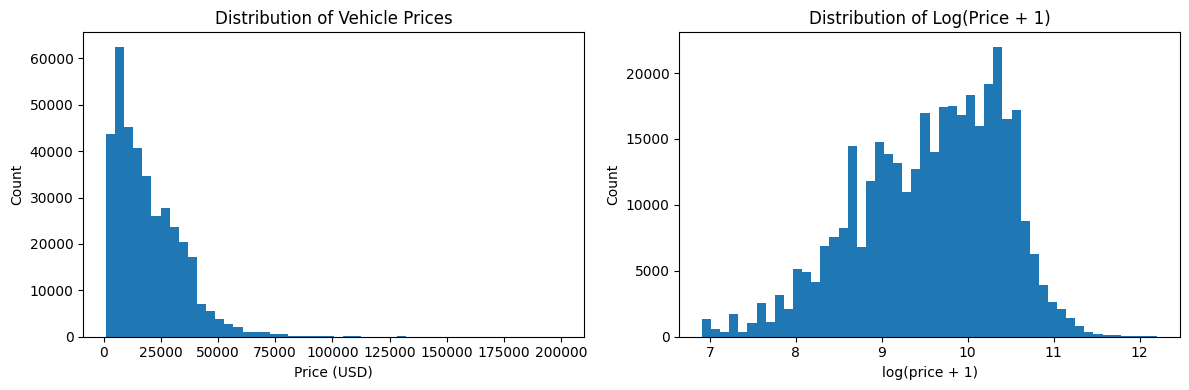

In [15]:
# Histogram of raw prices and log-transformed prices
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Raw price distribution
axes[0].hist(cars["price"], bins=50)
axes[0].set_title("Distribution of Vehicle Prices")
axes[0].set_xlabel("Price (USD)")
axes[0].set_ylabel("Count")

# Log-price distribution
axes[1].hist(cars["price_log"], bins=50)
axes[1].set_title("Distribution of Log(Price + 1)")
axes[1].set_xlabel("log(price + 1)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


 - **Left plot:** how skewed raw prices are.

 - **Right plot:** how log-transforming price makes the distribution more symmetric and friendly for linear models.

### 7.2 Price vs Age and Odometer (Basic Relationships)

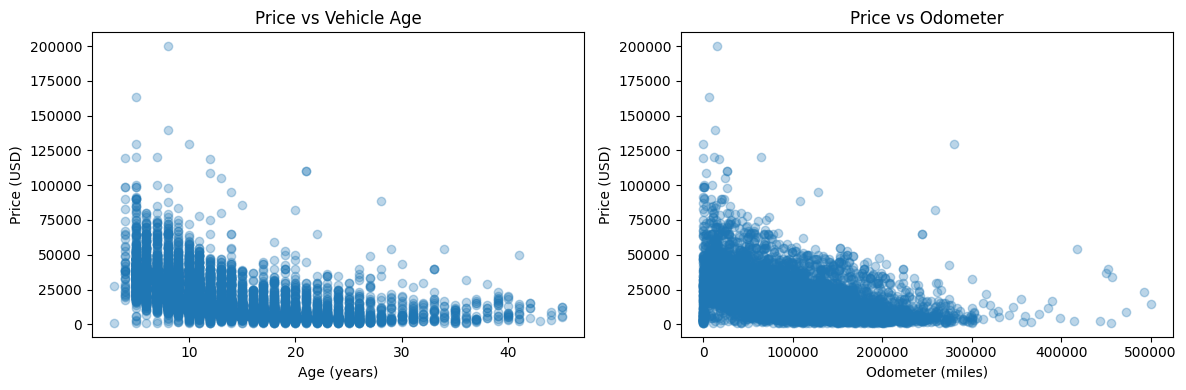

In [16]:
# Scatter plots of price vs age and price vs odometer for a random subset
sample = cars.sample(n=10000, random_state=42)  # downsample for clarity

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Price vs Age
axes[0].scatter(sample["age"], sample["price"], alpha=0.3)
axes[0].set_title("Price vs Vehicle Age")
axes[0].set_xlabel("Age (years)")
axes[0].set_ylabel("Price (USD)")

# Price vs Odometer
axes[1].scatter(sample["odometer"], sample["price"], alpha=0.3)
axes[1].set_title("Price vs Odometer")
axes[1].set_xlabel("Odometer (miles)")
axes[1].set_ylabel("Price (USD)")

plt.tight_layout()
plt.show()


### 7.3 Actual vs Predicted Price (Model Performance Visualization)

This uses the **tuned best model**

Test RMSE (price, dollars): 8746.542421155764


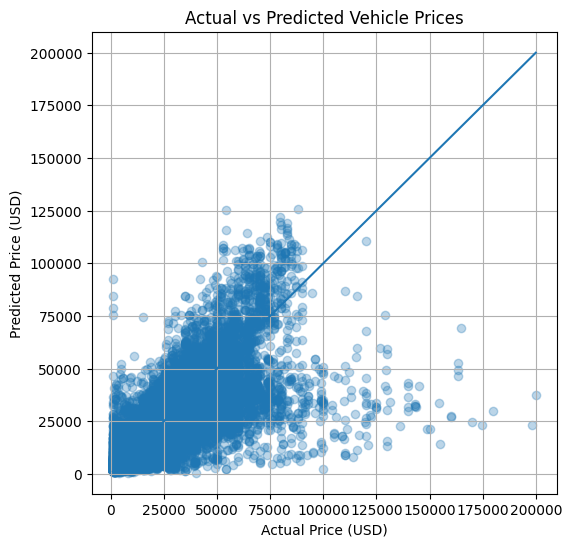

In [17]:
# Use your best model to get predictions on the test set
best_model = grid_search.best_estimator_

# Predictions in log space
y_pred_log = best_model.predict(X_test)

# Convert both y_test and predictions back to dollar space
y_test_price = np.expm1(y_test)
y_pred_price = np.expm1(y_pred_log)

# Compute RMSE for reference
rmse_price = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
print("Test RMSE (price, dollars):", rmse_price)

# Scatter plot: Actual vs Predicted price
plt.figure(figsize=(6, 6))
plt.scatter(y_test_price, y_pred_price, alpha=0.3)
plt.plot([y_test_price.min(), y_test_price.max()],
         [y_test_price.min(), y_test_price.max()])
plt.title("Actual vs Predicted Vehicle Prices")
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.grid(True)
plt.show()

 - Points near the diagonal line indicate good predictions.

 - The tighter the cloud around the line, the more accurate the model.

### 7.4 SVD Components – Variance Explained

This visualizes how much variance each TruncatedSVD component captures.

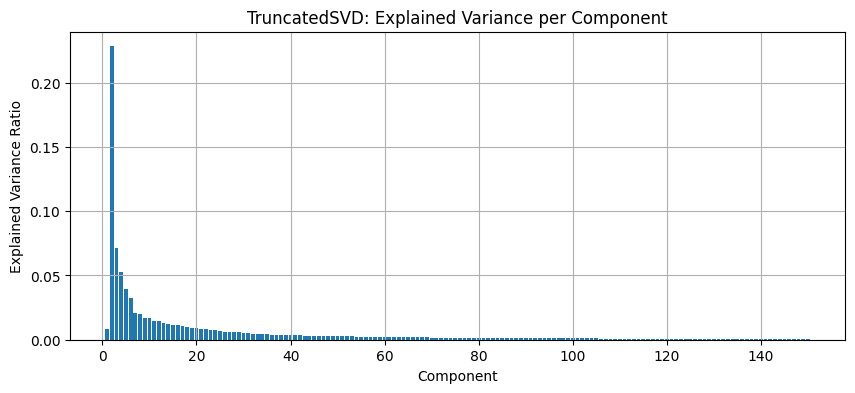

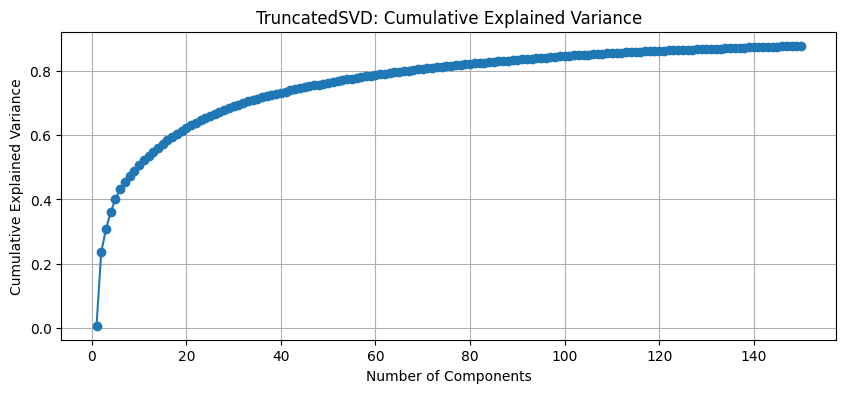

In [18]:
# Grab the fitted SVD step
svd = best_model.named_steps["svd"]

explained = svd.explained_variance_ratio_
cum_explained = np.cumsum(explained)

# Bar plot of explained variance ratio
plt.figure(figsize=(10, 4))
plt.bar(range(1, len(explained) + 1), explained)
plt.xlabel("Component")
plt.ylabel("Explained Variance Ratio")
plt.title("TruncatedSVD: Explained Variance per Component")
plt.grid(True)
plt.show()

# Line plot of cumulative explained variance
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(cum_explained) + 1), cum_explained, marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("TruncatedSVD: Cumulative Explained Variance")
plt.grid(True)
plt.show()


 - **First plot:** How much each component contributes individually.

 - **Second plot:** How quickly components together capture total variance (e.g., “first 100 components capture ~X% of variance”).

### 7.5 Feature Importance from SVD + Ridge

Since Ridge was applied after TruncatedSVD, the raw Ridge coefficients are on the SVD components, not directly on the original features. This provides a visualization of:

1. Importance of SVD components

2. Approximate importance of original features by back-projecting through the SVD components.

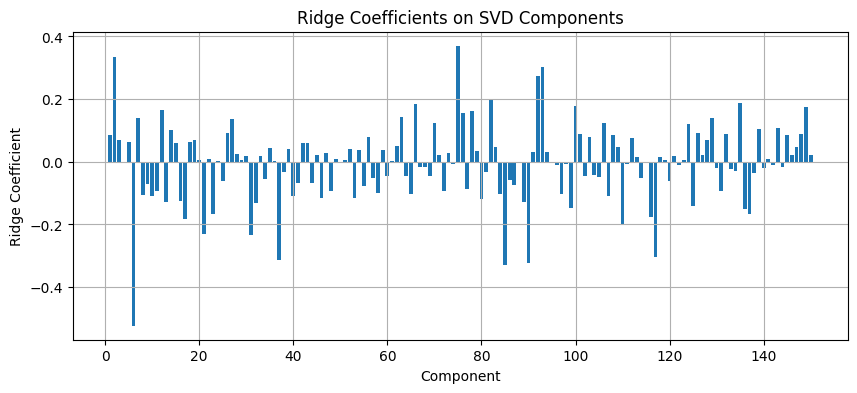

In [19]:
ridge = best_model.named_steps["ridge"]
svd = best_model.named_steps["svd"]

ridge_coefs = ridge.coef_  # one coefficient per SVD component
n_components = len(ridge_coefs)

plt.figure(figsize=(10, 4))
plt.bar(range(1, n_components + 1), ridge_coefs)
plt.xlabel("Component")
plt.ylabel("Ridge Coefficient")
plt.title("Ridge Coefficients on SVD Components")
plt.grid(True)
plt.show()


This shows which latent components push price up (positive coefficients) or down (negative coefficients), with larger magnitudes indicating a more substantial effect on the prediction.

## 8. References

The following list of references supported the overall project strategy and coding.

<br>

### CRISP-DM Framework

CRISP-DM Overview (IBM)
https://www.ibm.com/docs/en/spss-modeler/18.2.0?topic=dm-crisp-help-overview

CRISP-DM Process Model Description
https://www.the-modeling-agency.com/crisp-dm.pdf

Wikipedia: CRISP-DM
https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining

<br>

### Dataset Source & Context (Used Cars Data)

Kaggle: 3M Used Cars Dataset
https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset

Original Vehicles Dataset Description (similar schema)
https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

<br>

### Data Preparation & Preprocessing (scikit-learn)

ColumnTransformer documentation
https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

Pipeline documentation
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

SimpleImputer documentation
https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

StandardScaler documentation
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

OneHotEncoder documentation
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

Handling unknown categories in OneHotEncoder
https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features

get_feature_names_out (important for back-projection of SVD features)
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder.get_feature_names_out

<br>

### Dimensionality Reduction (TruncatedSVD)

TruncatedSVD documentation
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

Choosing between PCA and TruncatedSVD (sparse data)
https://scikit-learn.org/stable/modules/decomposition.html#truncated-singular-value-decomposition-and-latent-semantic-analysis

Sparse matrix dimensionality reduction
https://scikit-learn.org/stable/modules/decomposition.html#lsa

<br>

### Regression Modeling (Ridge Regression)

Ridge Regression documentation
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

Ridge regularization theory
https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression

Bias–variance tradeoff explanation
https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff

L2 regularization (mathematical reference)
https://en.wikipedia.org/wiki/Tikhonov_regularization

<br>

### Model Selection & Cross-Validation

GridSearchCV documentation
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

cross_val_score documentation
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

Model Evaluation and Scoring in sklearn
https://scikit-learn.org/stable/modules/model_evaluation.html

<br>

### Visualization References (Matplotlib + Data Analysis)

Matplotlib documentation
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

Scatter plots (price vs age, odometer, etc.)
https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_plot.html

Histograms
https://matplotlib.org/stable/gallery/statistics/hist.html

Bar charts (feature importances, SVD coefficients)
https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html

<br>

### Machine Learning Best Practices (General)

Feature engineering strategies (Kaggle docs)
https://www.kaggle.com/general/157382

Why use log-transform for skewed targets
https://stats.stackexchange.com/questions/127318/why-log-transform-the-dependent-variable-in-a-regression-model

Interpreting coefficients for linear models
https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

Residual analysis and model diagnostics
https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

<br>

### Dimensionality Reduction + Linear Regression Integration

How SVD supports linear regression with high-dimensional sparse data
https://scikit-learn.org/stable/modules/decomposition.html#latent-semantic-analysis

Back-projecting SVD components to estimate feature importance
https://stackoverflow.com/questions/55201881/get-feature-importances-from-sklearn-truncatedsvd

Using SVD before regression to stabilize multicollinearity
https://en.wikipedia.org/wiki/Singular_value_decomposition#Applications